In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("DKI Jakarta.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       299 non-null    float64       
 2   Tx       312 non-null    float64       
 3   Tavg     312 non-null    float64       
 4   RH_avg   312 non-null    float64       
 5   RR       243 non-null    float64       
 6   ss       310 non-null    float64       
 7   ff_x     313 non-null    float64       
 8   ddd_x    313 non-null    float64       
 9   ff_avg   313 non-null    float64       
 10  ddd_car  313 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-9730db86a394>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.8,29.8,38.0,25.9
1,2023-02-01,23.4,30.0,134.4,27.2
2,2023-03-01,25.0,29.0,0.7,26.7
3,2023-04-01,24.6,30.6,3.2,27.0
4,2023-05-01,23.6,31.6,31.3,27.5
...,...,...,...,...,...
309,2023-10-28,27.0,33.6,NaN,30.3
310,2023-10-29,27.0,34.0,0.0,29.8
311,2023-10-30,27.0,33.8,0.0,30.7
312,2023-10-31,27.8,33.6,NaN,29.8


In [4]:
# cek duplikat
df1.duplicated().sum()

6

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.8,29.8,38.0,25.9
1,31,31,2023-01-02,26.4,29.8,0.4,27.5
2,60,61,2023-01-03,24.6,29.8,12.7,26.7
3,59,60,2023-01-03,25.0,29.4,11.0,26.7
4,91,92,2023-01-04,26.2,31.0,0.0,28.1
...,...,...,...,...,...,...,...
303,165,167,2023-12-06,26.2,33.8,0.0,30.1
304,195,198,2023-12-07,26.0,32.0,NaN,29.1
305,226,230,2023-12-08,25.8,33.6,NaN,28.8
306,257,262,2023-12-09,26.2,34.4,0.0,29.6


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         15
Tx          2
RR         69
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

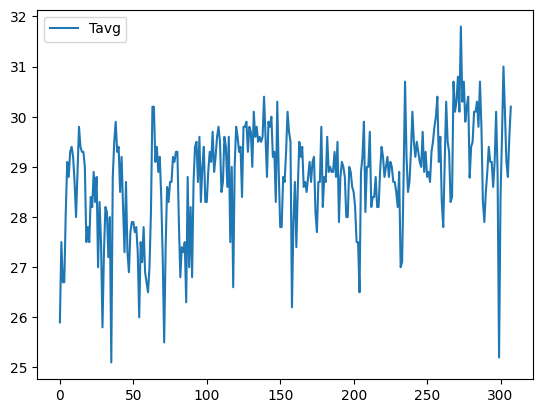

In [10]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

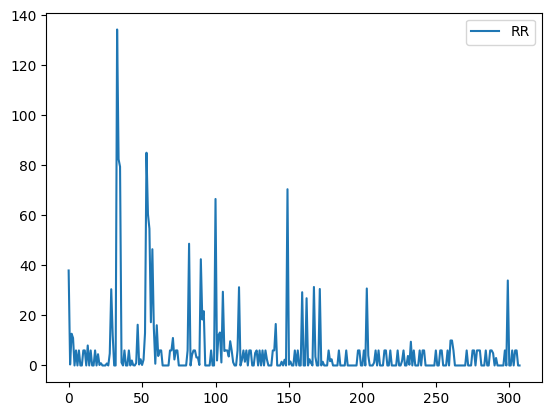

In [11]:
#plotting tavg
df1[['RR']].plot()

In [12]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    print(row)

level_0                      1
index                        1
Tanggal    2023-02-01 00:00:00
Tn                        23.4
Tx                        30.0
RR                       134.4
Tavg                      27.2
Name: 33, dtype: object
level_0                     32
index                       33
Tanggal    2023-02-02 00:00:00
Tn                        24.4
Tx                        30.6
RR                        82.5
Tavg                      28.0
Name: 34, dtype: object
level_0                     53
index                       54
Tanggal    2023-02-23 00:00:00
Tn                        24.4
Tx                        30.2
RR                        85.1
Tavg                      27.3
Name: 53, dtype: object


In [13]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

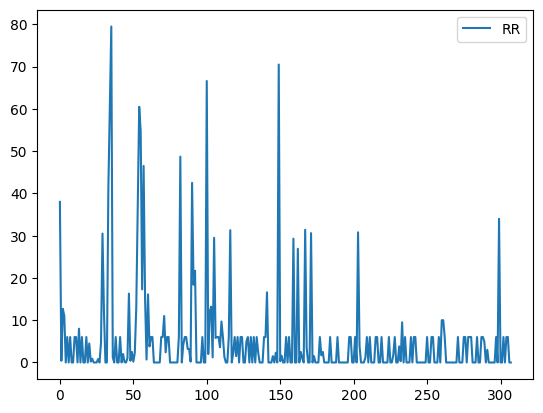

In [14]:
df1[['RR']].plot()

In [15]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.8,29.8,38.000000,25.9,29.8,27.5,0.400000
1,31,31,2023-01-02,26.4,29.8,0.400000,27.5,29.8,26.7,12.700000
2,60,61,2023-01-03,24.6,29.8,12.700000,26.7,29.4,26.7,11.000000
3,59,60,2023-01-03,25.0,29.4,11.000000,26.7,31.0,28.1,0.000000
4,91,92,2023-01-04,26.2,31.0,0.000000,28.1,31.4,29.1,6.020084
...,...,...,...,...,...,...,...,...,...,...
303,165,167,2023-12-06,26.2,33.8,0.000000,30.1,32.0,29.1,6.020084
304,195,198,2023-12-07,26.0,32.0,6.020084,29.1,33.6,28.8,6.020084
305,226,230,2023-12-08,25.8,33.6,6.020084,28.8,34.4,29.6,0.000000
306,257,262,2023-12-09,26.2,34.4,0.000000,29.6,35.2,30.2,0.000000


In [16]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.400000
1,0.400000,27.5,26.7,12.700000
2,12.700000,26.7,26.7,11.000000
3,11.000000,26.7,28.1,0.000000
4,0.000000,28.1,29.1,6.020084
...,...,...,...,...
303,0.000000,30.1,29.1,6.020084
304,6.020084,29.1,28.8,6.020084
305,6.020084,28.8,29.6,0.000000
306,0.000000,29.6,30.2,0.000000


In [17]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.400000
1,0.400000,27.5,26.7,12.700000
2,12.700000,26.7,26.7,11.000000
3,11.000000,26.7,28.1,0.000000
4,0.000000,28.1,29.1,6.020084
...,...,...,...,...
302,6.020084,31.0,30.1,0.000000
303,0.000000,30.1,29.1,6.020084
304,6.020084,29.1,28.8,6.020084
305,6.020084,28.8,29.6,0.000000


In [18]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,38.000000,25.9,27.5,0.400000,0
1,0.400000,27.5,26.7,12.700000,1
2,12.700000,26.7,26.7,11.000000,2
3,11.000000,26.7,28.1,0.000000,3
4,0.000000,28.1,29.1,6.020084,4
...,...,...,...,...,...
302,6.020084,31.0,30.1,0.000000,302
303,0.000000,30.1,29.1,6.020084,303
304,6.020084,29.1,28.8,6.020084,304
305,6.020084,28.8,29.6,0.000000,305


In [20]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['Tavg']
y1 = df1["pta"]

X2 = df1['RR']
y2 = df1["ptr"]

X3 = df1['Indeks']
y3 = df1["RR"]

In [21]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [22]:
X_train = np.array(X_train).reshape(-1, 1)

In [23]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([28.88275213, 28.83028227, 29.19757131, 28.77781241, 28.98769186,
       28.72534254, 28.77781241, 28.67287268, 28.98769186, 29.09263159,
       29.25004118, 29.35498091, 29.56486036, 28.88275213, 29.14510145,
       28.46299322, 28.2006439 , 28.88275213, 29.5123905 , 29.09263159,
       28.98769186, 28.46299322, 28.51546309, 29.72226995, 29.40745077,
       29.5123905 , 29.77473981, 29.40745077, 30.29943845, 29.5123905 ,
       29.72226995, 29.30251104, 29.45992063, 29.56486036, 28.71711197,
       29.04016172, 29.09263159, 29.40745077, 29.40745077, 29.5123905 ,
       29.25004118, 29.72226995, 29.25004118, 28.46299322, 28.25311377,
       28.56793295, 28.77781241, 29.04016172, 28.88275213, 28.88275213,
       28.62040281, 28.88275213, 29.40745077, 28.77781241, 26.83642745,
       28.51546309, 29.14510145, 29.87967954, 29.40745077, 28.88275213,
       28.72534254, 29.14510145])

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.7251592059118198

In [26]:
X_test['Indeks'] = X_test.index
X_test

245                                                    29.1
246                                                    29.0
247                                                    29.7
248                                                    28.9
249                                                    29.3
                                ...                        
303                                                    30.1
304                                                    29.1
305                                                    28.8
306                                                    29.6
Indeks    Int64Index([245, 246, 247, 248, 249, 250, 251,...
Name: Tavg, Length: 63, dtype: object

In [27]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
245,28.882752
246,28.830282
247,29.197571
248,28.777812
249,28.987692
...,...
302,29.879680
303,29.407451
304,28.882752
305,28.725343


In [28]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-28-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.9,NaN
1,27.5,NaN
2,26.7,NaN
3,26.7,NaN
4,28.1,NaN
...,...,...
302,31.0,29.879680
303,30.1,29.407451
304,29.1,28.882752
305,28.8,28.725343


<Axes: >

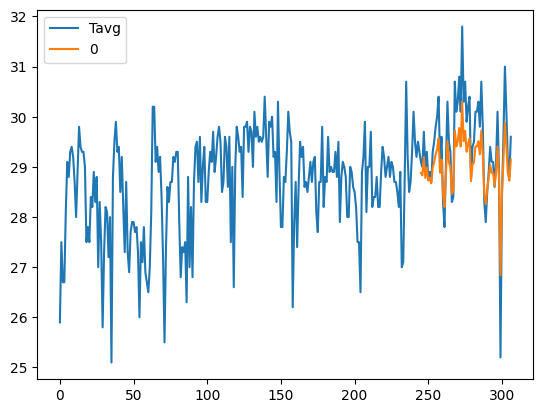

In [29]:
kan.plot()

In [30]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([13.61402181, 14.13872044, 14.66341908, 15.18811772, 15.71281635,
       16.23751499, 16.76221363])

In [31]:
kan.to_json('prediksi_DKI Jakarta')